In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
atp = pd.read_csv('atp_data_preprocessed.csv')

In [3]:
atp.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_month
0,2023-9900,United Cup,Hard,18,A,2023-01-02,300,126203,3,NaN,...,47,15,12,9,9,9,3355,16,2375,1
1,2023-9900,United Cup,Hard,18,A,2023-01-02,299,126207,0,NaN,...,8,3,4,1,3,19,2000,23,1865,1
2,2023-9900,United Cup,Hard,18,A,2023-01-02,296,126203,3,NaN,...,51,7,12,2,2,9,3355,10,2905,1
3,2023-9900,United Cup,Hard,18,A,2023-01-02,295,126207,0,NaN,...,26,12,9,6,9,19,2000,245,220,1
4,2023-9900,United Cup,Hard,18,A,2023-01-02,292,126774,1,NaN,...,48,18,16,1,2,4,5550,16,2375,1


In [7]:
atp['tourney_date'] = pd.to_datetime(atp['tourney_date'])

# Convert 'tourney_month' to a categorical data type
atp['tourney_month'] = atp['tourney_month'].astype('category')

# Convert columns to the 'category' data type for categorical variables
atp['surface'] = atp['surface'].astype('category')
atp['tourney_level'] = atp['tourney_level'].astype('category')

In [9]:
# Univariate Analysis

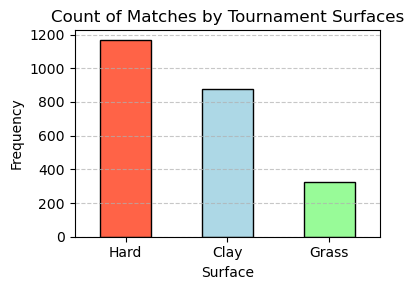

In [21]:
plt.figure(figsize=(4, 3))
colors = ['#FF6347', '#ADD8E6', '#98FB98']  # Custom colors for the bars
atp['surface'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Count of Matches by Tournament Surfaces')
plt.xlabel('Surface')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.tight_layout()  # Adjusts the layout to prevent clipping of labels
plt.show()

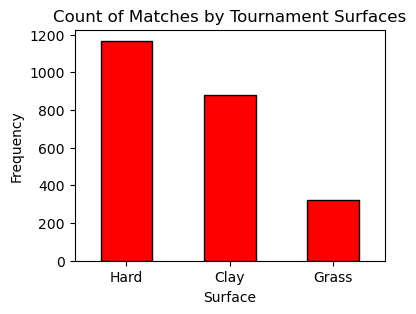

In [13]:
# Nominal Data Type
# No of matches by surface Type
plt.figure(figsize=(4, 3))
atp['surface'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Count of Matches by Tournament Surfaces')
plt.xlabel('Surface')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

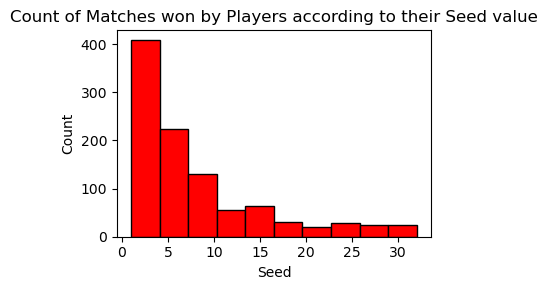

In [ ]:
# Ordinal Data Type
# Counting occurrences of each seed value
import matplotlib.pyplot as plt

# Filtering out rows where winner_seed is not equal to 0
filtered_data = atp[atp['winner_seed'] != 0]

# Plotting a histogram excluding players with seed 0
plt.figure(figsize=(4,3))
filtered_data['winner_seed'].plot(kind='hist', color='red', edgecolor='black')
plt.title('Count of Matches won by Players according to their Seed value')
plt.xlabel('Seed')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.tight_layout()
plt.show()


/tmp/ipykernel_96/982520107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['winner_seed'] = filtered_data['winner_seed'].astype('category')


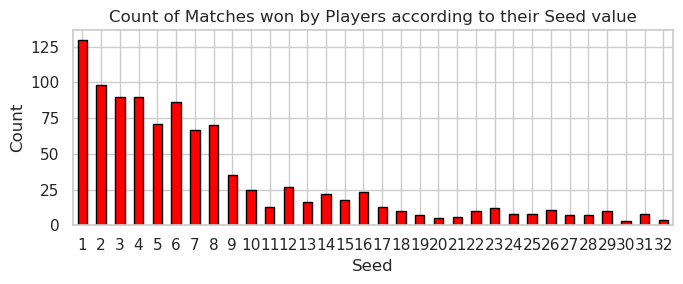

In [74]:
filtered_data = atp[atp['winner_seed'] != 0]

# Convert 'winner_seed' to categorical
filtered_data['winner_seed'] = filtered_data['winner_seed'].astype('category')

# Plotting a bar chart excluding players with seed 0
plt.figure(figsize=(7,3))
filtered_data['winner_seed'].value_counts().sort_index().plot(kind='bar', color='red', edgecolor='black')
plt.title('Count of Matches won by Players according to their Seed value')
plt.xlabel('Seed')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.tight_layout()
plt.show()

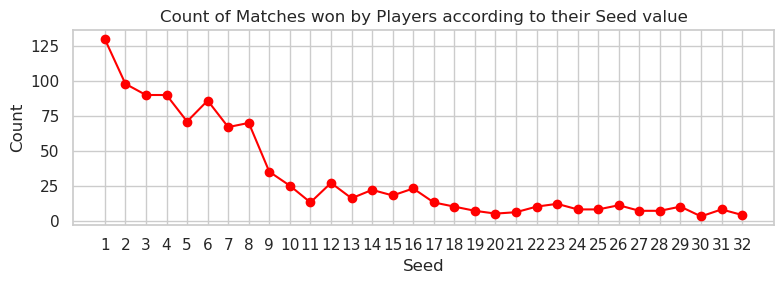

In [82]:
# Ordinal Data Type
# Counting occurrences of each seed value
seed_counts = filtered_data['winner_seed'].value_counts().sort_index()

# Plotting a line plot excluding players with seed 0
plt.figure(figsize=(8,3))
plt.plot(seed_counts.index, seed_counts.values, marker='o', color='red', linestyle='-')
plt.title('Count of Matches won by Players according to their Seed value')
plt.xlabel('Seed')
plt.ylabel('Count')
plt.xticks(seed_counts.index)  # Set x ticks as seed values
plt.grid(True)
plt.tight_layout()
plt.show()

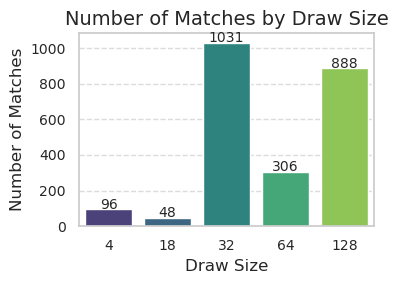

In [25]:
# Ratio Data Type
# Matches according to Draw size
specific_draw_sizes = [4, 18, 32, 64, 128]
matches_by_draw_size = [len(atp[atp['draw_size'] == size]) for size in specific_draw_sizes]

# Set style
sns.set(style="whitegrid")

# Plotting number of matches by draw size
plt.figure(figsize=(4,3))
ax = sns.barplot(x=specific_draw_sizes, y=matches_by_draw_size, palette="viridis")
plt.xlabel('Draw Size', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Number of Matches by Draw Size', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of bars
for i, val in enumerate(matches_by_draw_size):
    plt.text(i, val + 2, str(val), horizontalalignment='center', fontsize=10)

plt.tight_layout()

plt.show()

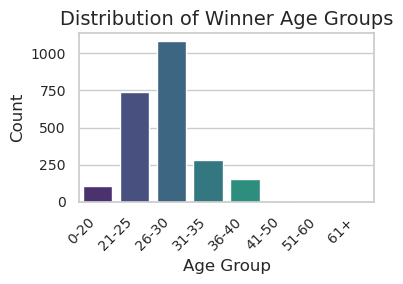

In [27]:
# Interval Data Type

bins = [0, 20, 25, 30, 35, 40, 50, 60, 100]
labels = ['0-20', '21-25', '26-30', '31-35', '36-40', '41-50', '51-60', '61+']

# Assign age groups to the data
atp['age_group'] = pd.cut(atp['winner_age'], bins=bins, labels=labels, right=False)

# Create a bar plot for age groups
plt.figure(figsize=(4,3))
sns.countplot(data=atp, x='age_group', palette='viridis')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Winner Age Groups', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [180]:
# Multi variate Analysis

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


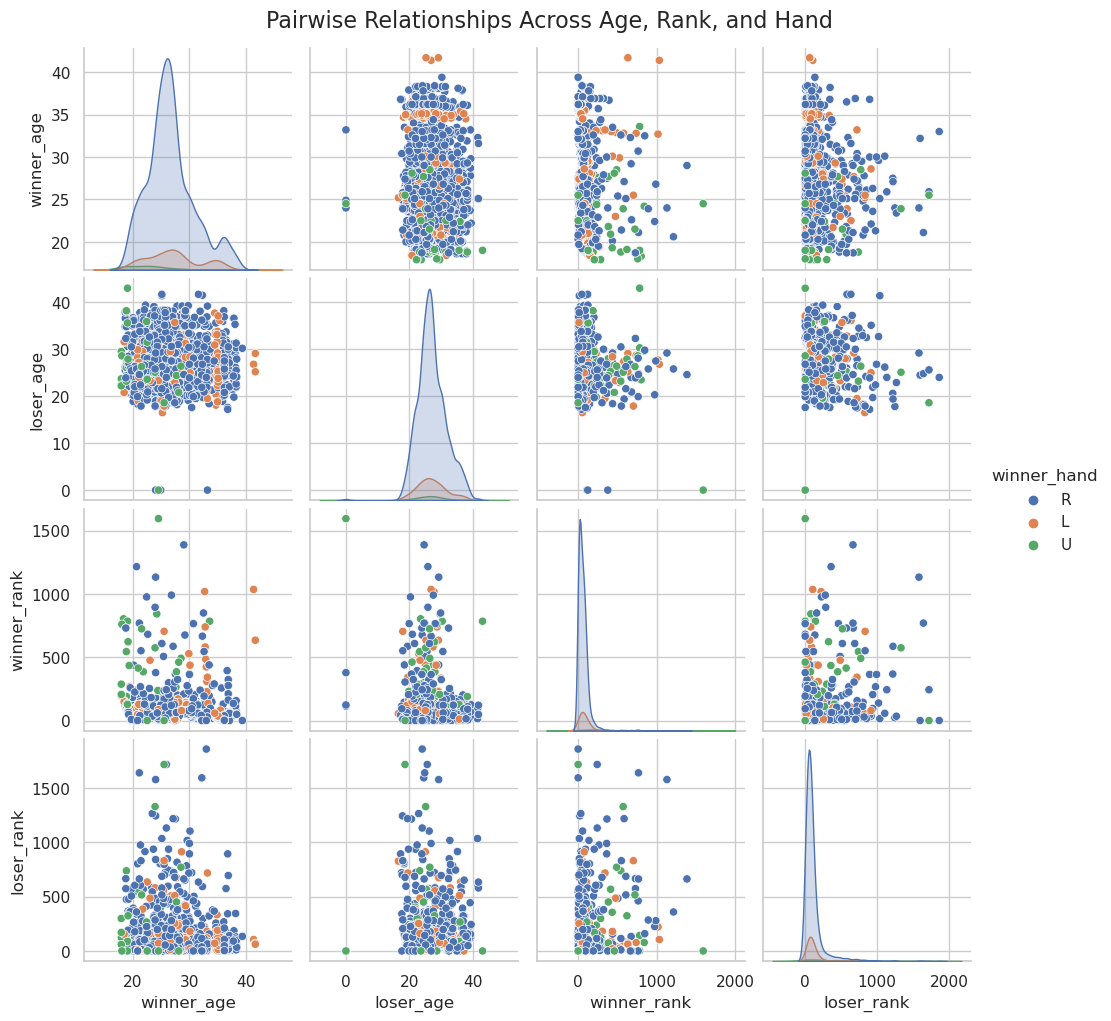

In [29]:
sns.set(style='whitegrid')

# Creating the pairplot
pair_plot = sns.pairplot(data=atp, vars=['winner_age', 'loser_age', 'winner_rank', 'loser_rank'], hue='winner_hand')

# Adding title
pair_plot.fig.suptitle('Pairwise Relationships Across Age, Rank, and Hand', y=1.02, fontsize=16)

# Display the plot
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


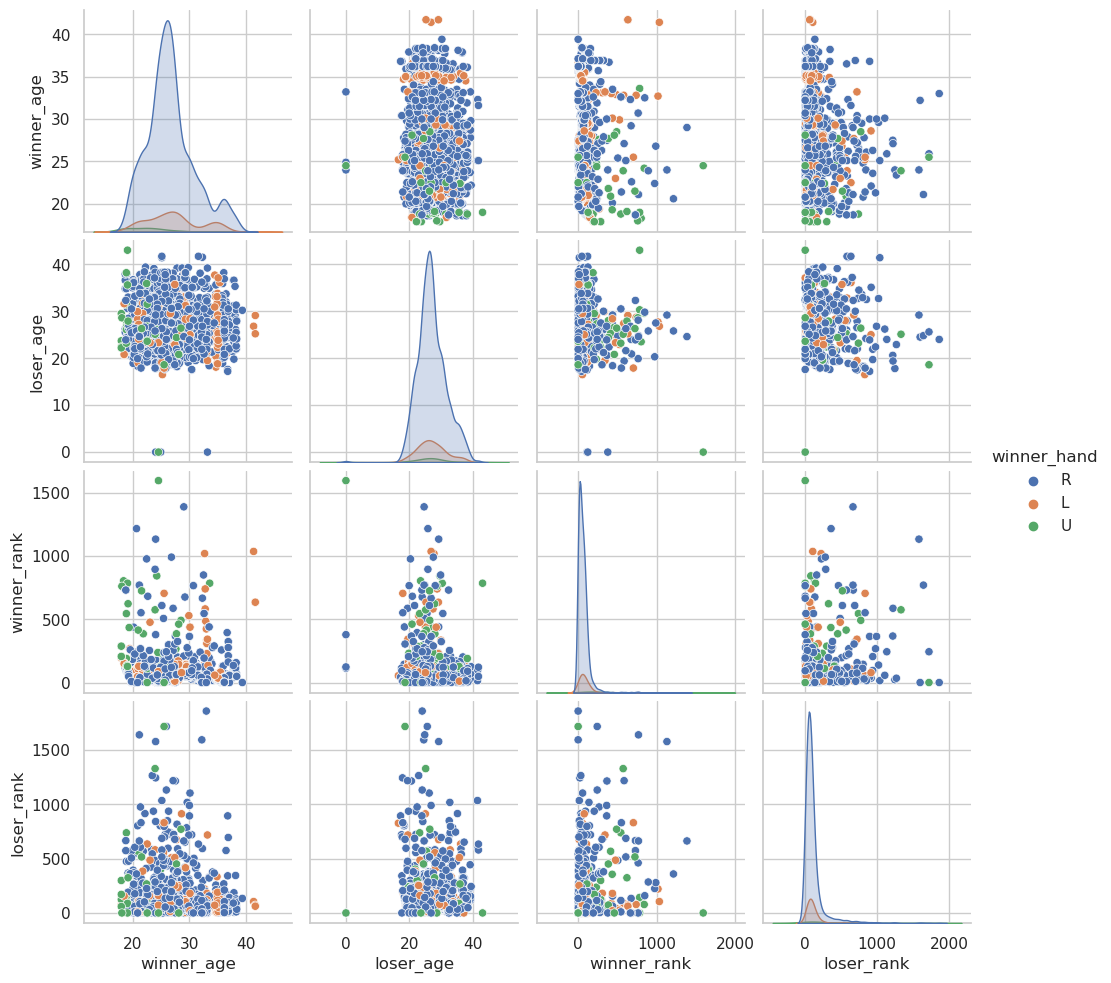

In [182]:
sns.pairplot(data=atp, vars=['winner_age', 'loser_age', 'winner_rank', 'loser_rank'], hue='winner_hand')
plt.show()

In [33]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(atp['tourney_level'], atp['winner_hand'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 74.33292491135734
p-value: 5.265532556862384e-14


In [37]:
# Question 2
# How much % is the match favorable towards the player rankings?

In [39]:
# Create a new column based on the condition
atp['better_rank'] = ['Y' if winner_rank < loser_rank else 'N' for winner_rank, loser_rank in zip(atp['winner_rank'], atp['loser_rank'])]


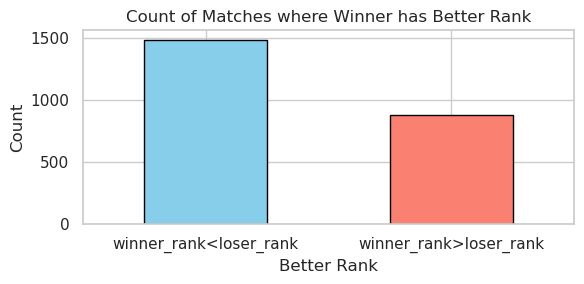

In [113]:
better_rank_counts = atp['better_rank'].value_counts()

# Dictionary to map labels
label_mapping = {'Y': 'winner_rank<loser_rank', 'N': 'winner_rank>loser_rank'}

# Replace labels using the mapping
better_rank_counts.index = better_rank_counts.index.map(label_mapping)

# Plotting a bar plot for 'better_rank' with modified labels
plt.figure(figsize=(6, 3))
better_rank_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Count of Matches where Winner has Better Rank')
plt.xlabel('Better Rank')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [43]:
# Calculate the count of matches where the winner has a better rank
better_rank_count = (atp['better_rank'] == 'Y').sum()

# Calculate the total number of matches
total_matches = len(atp)

# Calculate the percentage
percentage_favorable_ranking = (better_rank_count / total_matches) * 100

print(f"The percentage of matches favorable towards player rankings is: {percentage_favorable_ranking:.2f}%")


The percentage of matches favorable towards player rankings is: 62.81%


In [45]:
# Question 3
# Who is more advantageous to win a match? Right handed or Left Handed?

In [47]:
wins_by_hand = atp[atp['winner_hand'].isin(['R', 'L'])]['winner_hand'].value_counts()

# Count the number of matches played by each handedness
matches_winner = atp[atp['winner_hand'].isin(['R', 'L'])]['winner_hand']
matches_loser = atp[atp['loser_hand'].isin(['R', 'L'])]['loser_hand']
total_matches_by_hand = pd.concat([matches_winner, matches_loser]).value_counts()

# Calculate the win percentage for each handedness
win_percentages = (wins_by_hand / total_matches_by_hand) * 100
print(win_percentages)


winner_hand
R    51.260294
L    44.481605
Name: count, dtype: float64


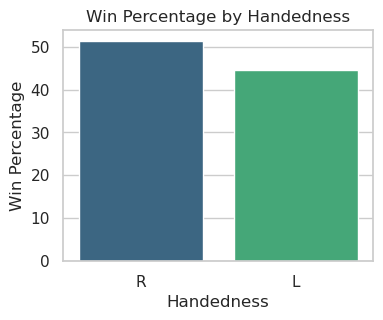

In [57]:
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(4,3))
sns.barplot(x=win_percentages.index, y=win_percentages.values, palette='viridis')
plt.xlabel('Handedness')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Handedness')
plt.show()